# 대응표본 t-test분석

##  대응표본이란?

두 집단의 자료를 쌍으로 묶을 수 있을 때

예) 남편과 아내, 쌍둥이, before & after

두 집단의 자료를 쌍으로 묶어야 하기 때문에, 독립표본과는 달리 두 집단의 자료 갯수가 동일해야 함


## 대응표본 조건

##### 참고사이트 - [https://blog.naver.com/istech7/50151133528](https://blog.naver.com/istech7/50151133528)

### 1. 자료는 모두 동일 간격을 가진 연속형 수치여야 한다 

키와 몸무게,혈압, 콜레스테롤 수치와 같은 값들은 두 숫자 사이에 끊임없이 다른 숫자가 나타날 수 있는 연속형 수치이며 또한 동일 간격을 가집니다. 이러한 특성을 가진 자료를 비 척도 자료라고 합니다.

반면, IQ 및 온도와 같은 수치도 동일 간격을 가지는 연속형 수치입니다.
하지만 위에서 든 예와는 달리 한 숫자를 다른 숫자에 비해 몇 배 더 크다라고 할 수는 없습니다. 섭씨 40도 온도가 섭씨 20도 온도보다 2배 더 덥다고 할 수 없는 것도 마찬가지입니다. 이러한 특성을 가진 자료를 간격 척도자료라고 합니다.

이렇게 자료가 동일 간격을 가진 연속형 수치인 비 척도 또는 간격 척도인 경우에만 대응 표본 T검정 방법을 사용할 수 있습니다.

### 2. 두 집단은 반드시 서로 짝을 이루고 있어야 합니다.

### 3. 자료의 수치는 정규성을 가져야 합니다. 좌 우가 거의 대칭구조를 보이는 정규분포를 이루어야합니다.



In [1]:
a<- read.csv('cosmetics.csv', header = T)

In [5]:
a

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3
2,1,6,4,5,1,5,100000,3,2,5,2,3,2,2,3,4
1,1,6,4,5,4,10,39000,3,2,2,1,2,4,4,4,4
2,2,4,5,2,2,2,40000,3,2,3,2,3,3,4,4,4
2,2,4,5,2,1,2,100000,3,3,3,1,3,2,3,4,4


### 연속형 변수 요약통계 한번에 보기 

|package|function |statistics |
|------|---|---|
|base|summary()|min, 1Q, median, mean, 3Q, max |
|pastecs| stat.desc()|nbr.val, nbr.null, nbr.na, min, max, range, sum,median, mean, var, std.dev, coef.var,skewness, kurtosis, normtest.W, normtest.p,SE.mean, CI.mean.p|
|psych |describe()|n, mean, std.dev, median, trimmed, mad,min, max, range, skew, kurtosis, se|

In [8]:
library('psych')

In [9]:
describe(a$satisf_b)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,247,2.890688,0.7809953,3,2.869347,0,1,5,4,0.1404754,0.3237416,0.04969354


In [10]:
describe(a$satisf_i)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,247,3.404858,0.8301096,3,3.482412,1.4826,1,5,4,-0.6955943,0.9204758,0.05281861


In [11]:
t.test(a$satisf_b, a$satisf_i, paired = T)


	Paired t-test

data:  a$satisf_b and a$satisf_i
t = -7.1559, df = 246, p-value = 9.519e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.6556945 -0.3726456
sample estimates:
mean of the differences 
               -0.51417 


In [12]:
describe(a$satisf_al)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,247,3.461538,0.7527311,4,3.512563,1.4826,1,5,4,-0.9803738,2.161749,0.04789513


In [13]:
describe(a$repurchase)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,247,3.554656,0.724182,4,3.633166,0,1,5,4,-1.27728,2.554179,0.0460786


In [14]:
t.test(a$satisf_al, a$repurchase, paired=T)
# p-value < 0.05(기준) 귀무가설은 기각된다.


	Paired t-test

data:  a$satisf_al and a$repurchase
t = -2.1233, df = 246, p-value = 0.03472
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.179495526 -0.006739292
sample estimates:
mean of the differences 
            -0.09311741 


In [23]:
t.test(a$repurchase, a$satisf_al, paired=T) 


	Paired t-test

data:  a$repurchase and a$satisf_al
t = 2.1233, df = 246, p-value = 0.03472
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.006739292 0.179495526
sample estimates:
mean of the differences 
             0.09311741 


##### 결론 - 통계적으로 유의하다 대립가설 성립

# 밀도함수 그리기

In [16]:
library(ggplot2)


Attaching package: 'ggplot2'

The following objects are masked from 'package:psych':

    %+%, alpha



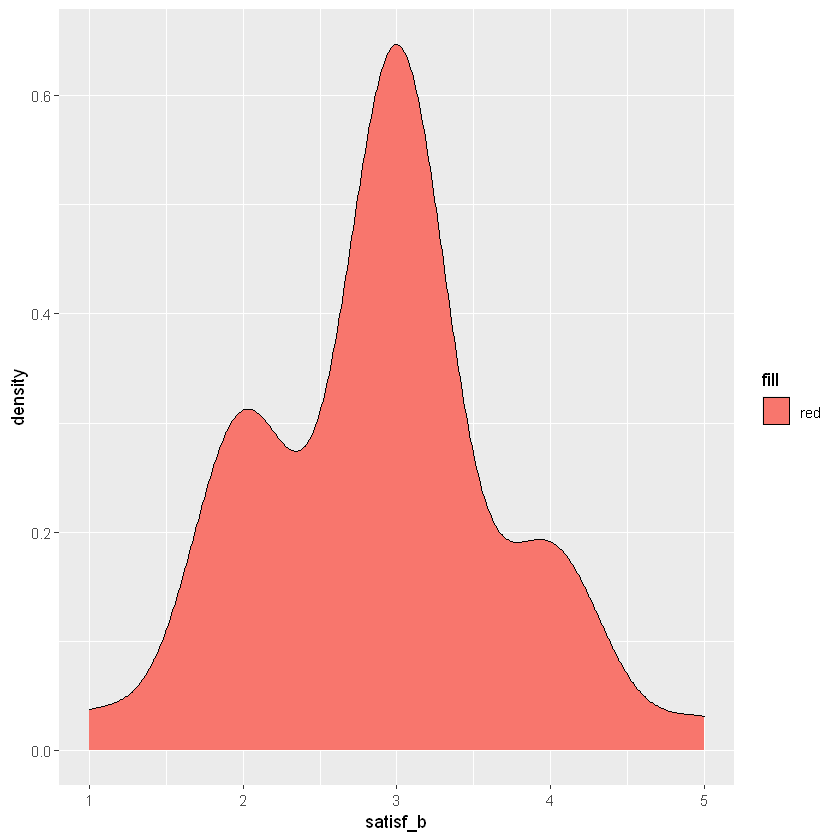

In [22]:
ggplot(data=a, aes(x=satisf_b, fill= 'red'))+geom_density(adjust=1.5)